# The Logistic Map

In [1]:
using Plots

The logistic map is defined as

$$
    x_{n+1} = r x_n (1-x_n)
$$

With $x_n \in [0, 1]$, $r\in[0,4]$

In [2]:
logistic_map(x, r) = r * x * (1 - x)

logistic_map (generic function with 1 method)

In [3]:
"""
Compute iterations of the logistic map

# Arguments
- `x0::Float64`: Starting value
- `r::Float64`: System value
- `n_iterations::Int64`: number of iterations
"""
function logistic_hist(x0::Float64, r::Float64, n_iterations::Int64=500)
    x_vals = zeros(n_iterations)
    x_vals[begin] = x0
    x = x0
    for n=2:n_iterations
        x = logistic_map(x, r)
        x_vals[n] = x
    end
    
    return x_vals
end

function plot_logistic_hist(x0, r, n_iterations=500)
    x_vals = logistic_hist(x0, r, n_iterations)
    plot(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn", size=(600, 300))
    plot!(title="Logistic | r=$r")
end

function plot_logistic_hist!(x0, r, n_iterations=500)
    x_vals = logistic_hist(x0, r, n_iterations)
    plot!(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn", size=(600, 300))
    plot!(title="Logistic | r=$r")
end

plot_logistic_hist! (generic function with 2 methods)

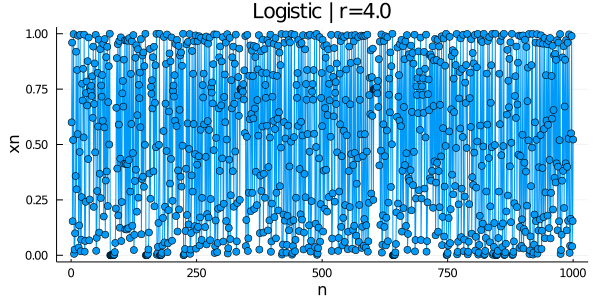

In [30]:
x0, r = 0.6, 4.0
plot_logistic_hist(x0, r, 1000)

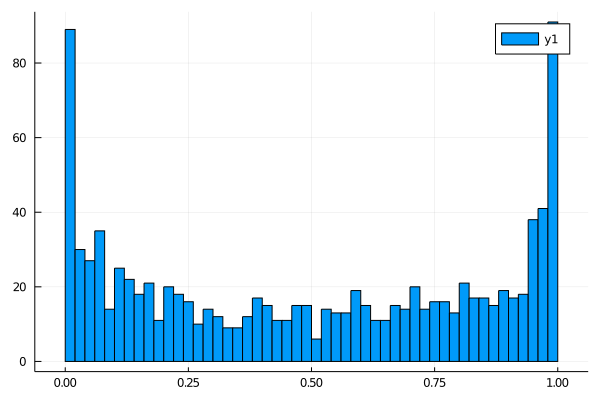

In [29]:
histogram(logistic_hist(x0, r, 1000), bins=50)

## Bifurcation diagram

In [5]:
r_vals = 0.8:0.01:4

iterated_values = zeros(0)
iterated_r_values = zeros(0)

x0 = 0.7
for r in r_vals
    iterated_r = unique(round.(logistic_hist(x0, r, 100_000)[end-100:end], digits=5))
    n_unique = size(iterated_r)
    append!(iterated_values, iterated_r)
    append!(iterated_r_values, ones(n_unique) .* r)
end

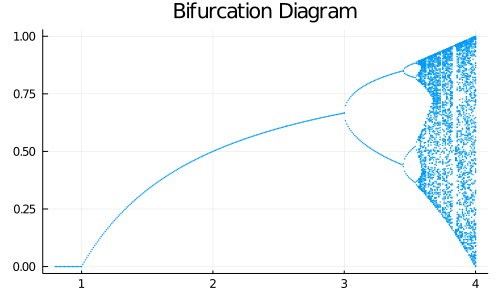

In [6]:
plot(title="Bifurcation Diagram")
scatter!(iterated_r_values, iterated_values, markersize=1, markerstrokewidth=0, size=(500, 300), label=nothing)

### Animating the bifurcation

In [9]:
n_rvals= size(iterated_r_values)[1]

init_r_array = Array{Bool}(undef, 1)
for n=1:n_rvals
    if n == 1
        append!(init_r_array, true)
    elseif iterated_r_values[n-1] == iterated_r_values[n]
        append!(init_r_array, false)
    else
        append!(init_r_array, true)
    end
end
init_r_array[end-100:end] .= true;

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH743P-complex-systems/review-notebooks/tmp.gif")
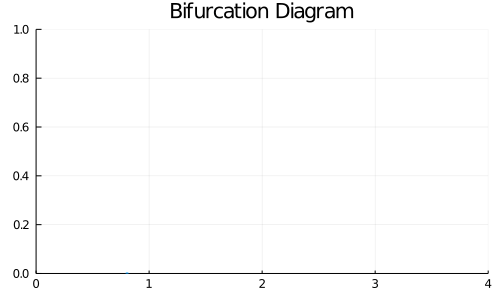

In [338]:
@gif for n=1:n_rvals
    plot(title="Bifurcation Diagram")
    scatter!(iterated_r_values[begin:n], iterated_values[begin:n],
                markersize=2,
                markerstrokewidth=0,
                label=nothing,
                size=(500, 300),
                ylim=(0, 1), xlim=(0, 4))
end when init_r_array[n]

## Stability of the logistic map

For a given discrete-time dynamical system $x_{n+1} = f(x_n)$, a fixed point $x^*$ of the dynamical system is stable if $|f(x^*)| < 1$

* If $x^*$ is a stable point, then a small perturbation on the initial value $x^*$, e.g. $x^* + \epsilon$ will eventually return to $f(x^*)$.

In [10]:
f(r, x) = r * x * (1 - x)
df(r, x) = r * (1 - 2x)

eps = 1e-5;

Consider the fixed point $x^*=0$, then
$$
    |f'(x^*)| = r
$$

Then, $x^*$ is stable if $r < 1$

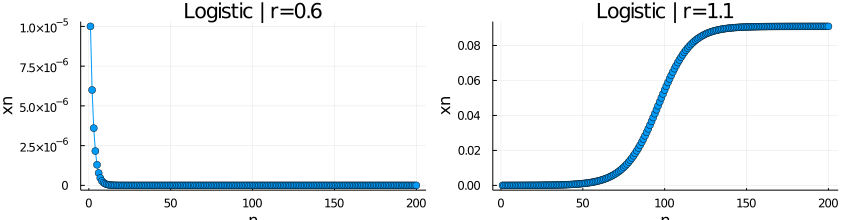

In [11]:
# stable / unstable
r0, r1 = 0.6, 1.1
x0 = 0 + eps
n_steps = 200

f1 = plot_logistic_hist(x0, r0, n_steps)
f2 = plot_logistic_hist(x0, r1, n_steps)

plot(f1, f2, size=(850, 220))

Next, consider the fixed point $x^* = 1 - 1 / r$, then

$$
    |f'(x^*)| = |2 - r|
$$

The fixed point is stable whenever $1 < r < 3$

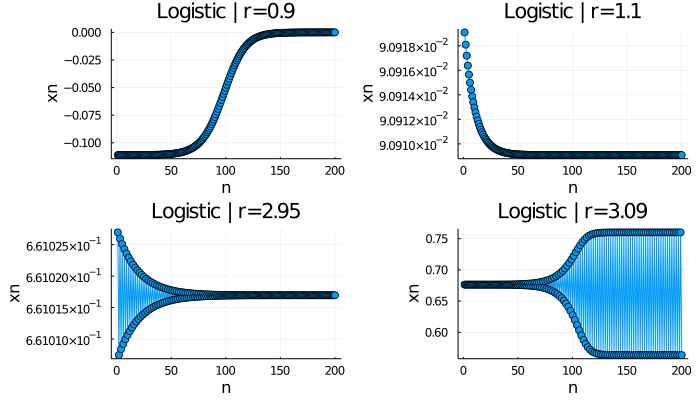

In [12]:
rvals = 0.9, 1.1, 2.95, 3.09

plots = Any[]
n_steps = 200
for r in rvals
    x0 = 1 - 1 / r
    p = plot_logistic_hist(x0 + eps, r, n_steps)
    append!(plots, (p,))
end

plot(plots..., size=(700, 400))

Finally, we consider the stability of the period-two orbit:

$$
    x^* = \frac{1}{2r}(1 + r \pm \sqrt{(r+1)(r-3)}),\quad 3 < r \leq 4
$$

In [13]:
r = 3.7
n_steps = 500
vv = [-1 1]
x00, x01 = (1 + r .+ vv * sqrt((r + 1) * (r - 3))) / 2r
st0, st1 = abs.(4 - r * (r - 2)) .* ones(2)

2-element Array{Float64,1}:
 2.290000000000001
 2.290000000000001

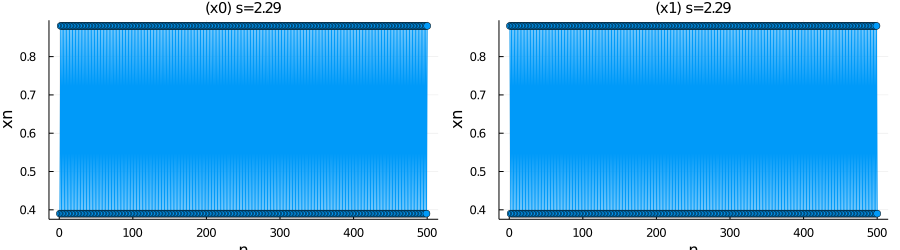

In [19]:
p1 = plot_logistic_hist(x00, r, n_steps)
plot!(title="(x0) s=$(round(st0, digits=4))", titlefontsize=10)
p2 = plot_logistic_hist(x01, r, n_steps)
plot!(title="(x1) s=$(round(st1, digits=4))", titlefontsize=10)

plot(p1, p2, size=(900, 250))

In [20]:
log_hist0_eps = logistic_hist(x00 + eps, r, n_steps)[end-5:end]
log_hist0 = logistic_hist(x00, r, n_steps)[end-5:end]

log_hist0_eps .- log_hist0

6-element Array{Float64,1}:
  0.3839329510970585
 -0.2329383428096683
  0.45468722358754904
 -0.3948990422036876
  0.5341835905885878
 -0.6210651170409591

In [21]:
log_hist1_eps = logistic_hist(x01 + eps, r, n_steps)[end-5:end]
log_hist1 = logistic_hist(x01, r, n_steps)[end-5:end]

log_hist1_eps .- log_hist1

6-element Array{Float64,1}:
 -0.3025984236735678
  0.5126687695151814
 -0.5552401343200928
  0.4216755751855142
 -0.3147234325079369
  0.5190919304632009

## Graphical representaion of stability

In [17]:
n_iterations = 20

r = 3.7
x0 = 0.1
x_values, y_values = x_values, y_values = [x0], [0.0]

x = x0

for _ in 1:n_iterations
    # y-update
    f_new = logistic_map(x, r)
    append!(x_values, x)
    append!(y_values, f_new)

    # x-update
    x = f_new
    append!(x_values, x)
    append!(y_values, x)
end

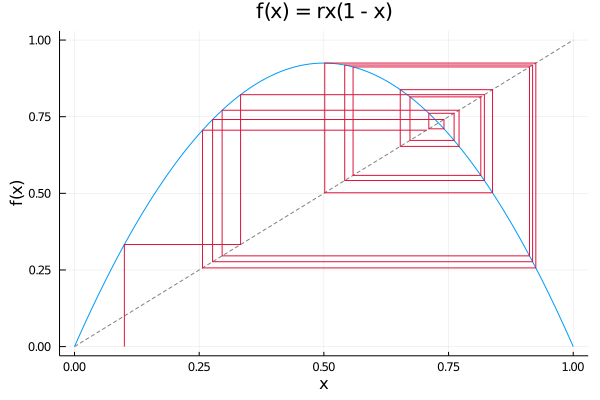

In [18]:
xrange = 0:0.01:1

plot(xrange, logistic_map.(xrange, r), label=nothing, title="f(x) = rx(1 - x)")
plot!(xrange, xrange, label=nothing, linestyle=:dash, color="gray")
plot!(x_values, y_values, color="crimson", label=nothing)
plot!(xlabel="x", ylabel="f(x)")